**The key difference between regression and classification models is that regression predicts continuous numerical values (like temperature or price), while classification predicts discrete categories or labels (like "spam" or "not spam")**

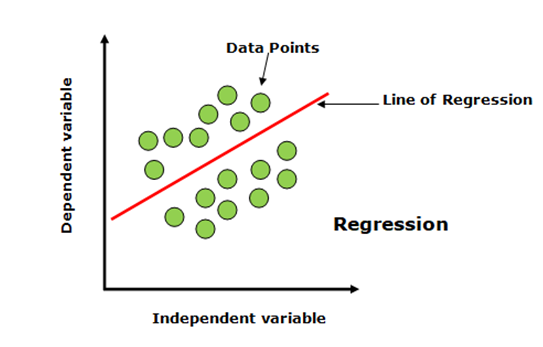



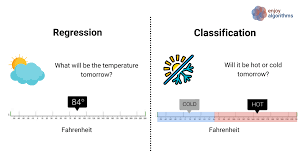

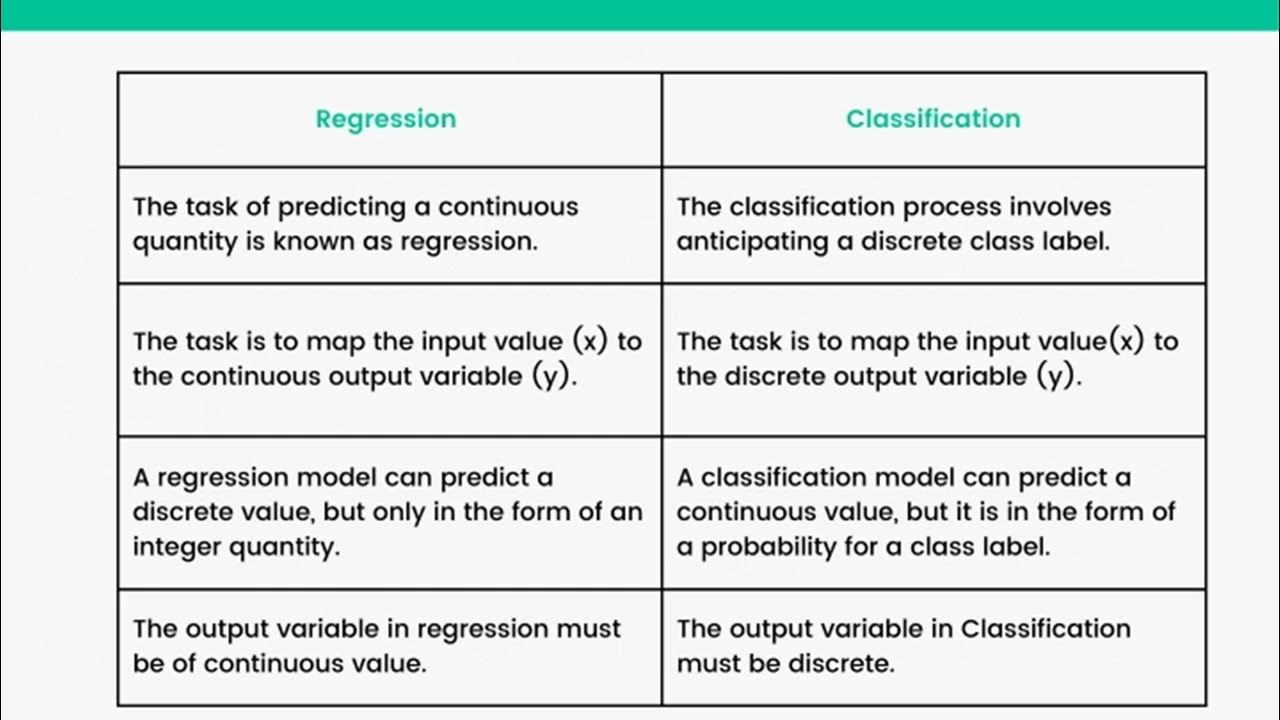


# **2.0 About Project**
- **Project Title**: Tip Prediction on Tips Dataset using Linear Regression

- **Task** :
    - To predict the tip amount on the basis of total bill, sex, smoker, time, day and size of the party.

# **3.0 Data Processing**


### **3.1 Importing Libraries** 

In [1]:
# !pip  install sklearn  
# # Importing Libraries
import numpy as np
import pandas as pd
import matpleaborotlib.pyplot as plt
import sn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **3.2 Loading the data** 

In [2]:
# Importing Data
df = sns.load_dataset('tips')

### **3.3 Having a look at data set** 

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df.shape

(244, 7)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
sex,244.0,0.643443,0.479967,0.00,0.0000,1.000,1.0000,1.00
smoker,244.0,0.381148,0.486667,0.00,0.0000,0.000,1.0000,1.00
day,244.0,1.741803,0.926815,0.00,1.0000,2.000,3.0000,3.00
time,244.0,0.278689,0.449276,0.00,0.0000,0.000,1.0000,1.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# **4.0 Univariate Analysis**

### **4.1 Total_bill** 

<Axes: ylabel='Frequency'>

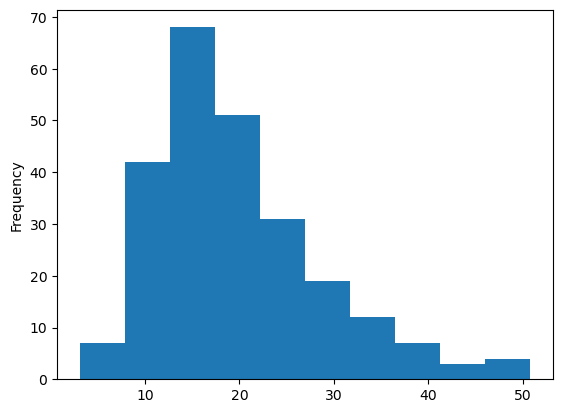

In [6]:
df['total_bill'].plot(kind='hist')

### **4.2 Tips** 

<Axes: ylabel='Frequency'>

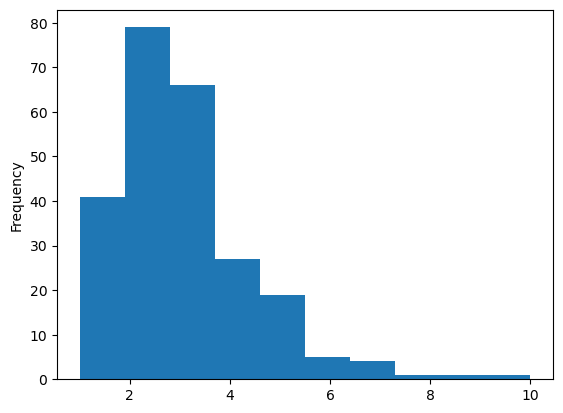

In [7]:
df['tip'].plot(kind='hist')

### **4.3 Sex** 

<Axes: xlabel='sex'>

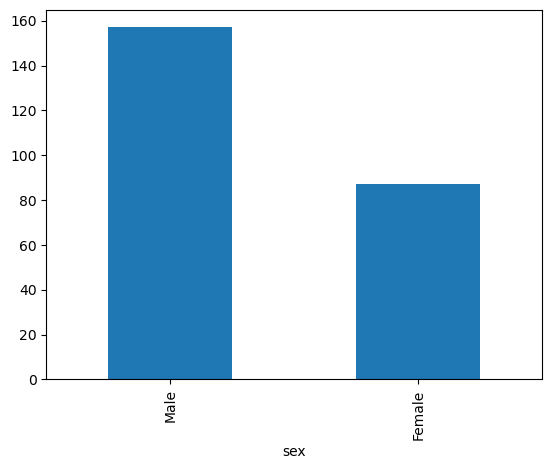

In [8]:
df['sex'].value_counts().plot(kind='bar')

### **4.4 Smoker** 

<Axes: xlabel='smoker'>

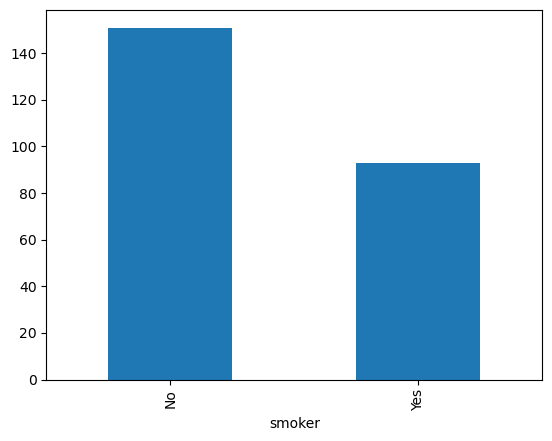

In [9]:
df['smoker'].value_counts().plot(kind='bar')

### **4.5 Time** 

<Axes: xlabel='time'>

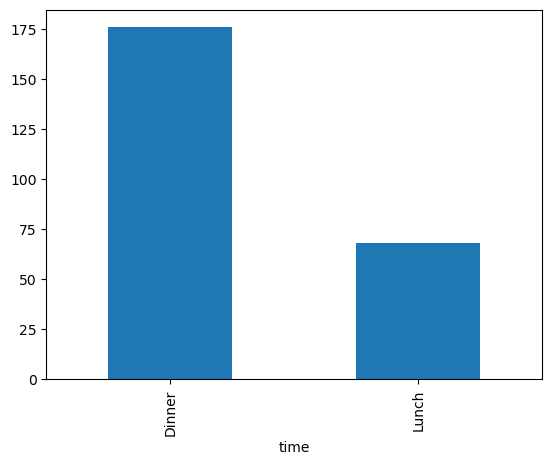

In [10]:
df['time'].value_counts().plot(kind='bar')

### **4.6 Day** 

<Axes: xlabel='day'>

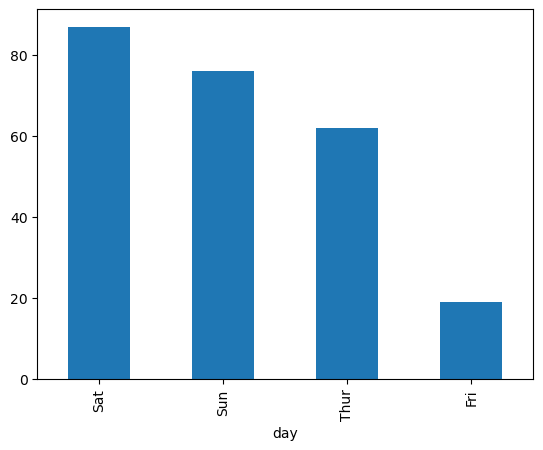

In [11]:
df['day'].value_counts().plot(kind='bar')

# **5.0 Bivariate Analysis**

### **5.1 Total_bill VS Tip** 

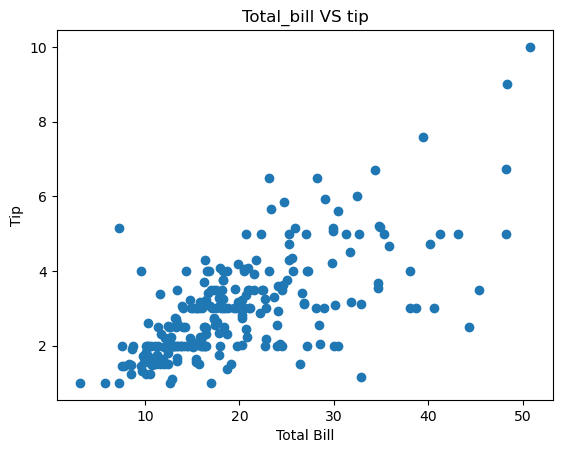

In [12]:
# Plotting the graph of total_bill and tip
plt.title('Total_bill VS tip')
plt.scatter(df['total_bill'], df['tip'])

plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

### **5.2 Total bill distribution between Male & Female** 

C:\Users\RC\AppData\Local\Temp\ipykernel_12900\1008486341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

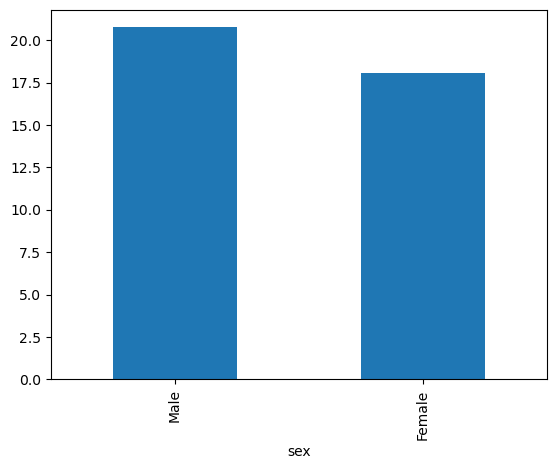

In [13]:
df.groupby('sex')['total_bill'].mean().plot(kind='bar')

### **5.3 Total bill distribution between Smoker & Non-Smoker** 

C:\Users\RC\AppData\Local\Temp\ipykernel_12900\4095181279.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='smoker'>

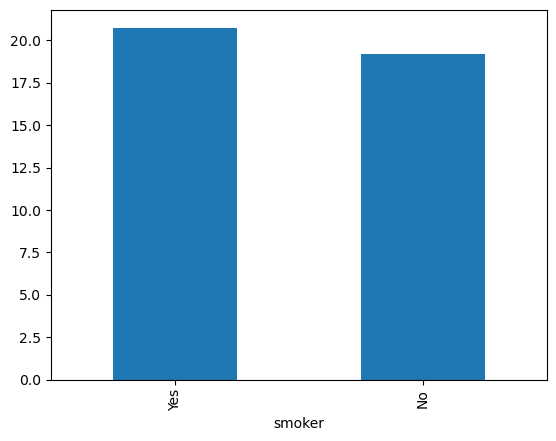

In [14]:
df.groupby('smoker')['total_bill'].mean().plot(kind='bar')

### **5.4 Total bill distribution amoung Days** 

C:\Users\RC\AppData\Local\Temp\ipykernel_12900\131234499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='day'>

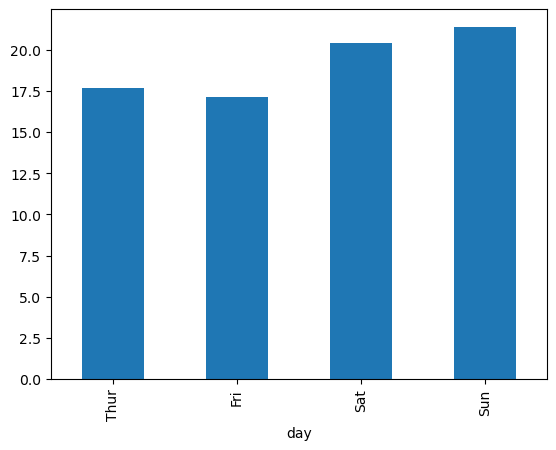

In [15]:
df.groupby('day')['total_bill'].mean().plot(kind='bar')

### **5.5 Total bill distribution between Time** 

C:\Users\RC\AppData\Local\Temp\ipykernel_12900\293175878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='time'>

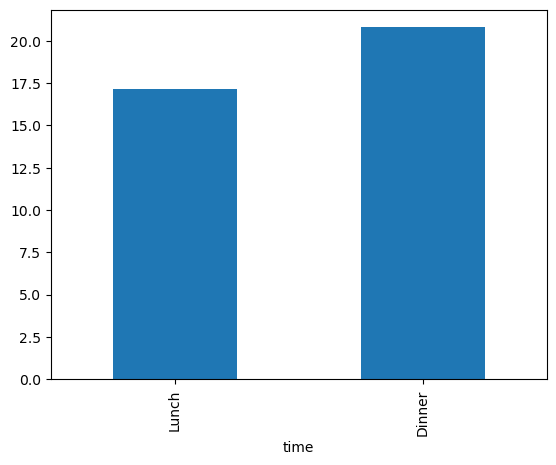

In [16]:
df.groupby('time')['total_bill'].mean().plot(kind='bar')

# **6.0 Multivariate Analysis**

### **6.1 Plotting the scatter plot of Total_bill, tip and sex** 

<Axes: xlabel='total_bill', ylabel='tip'>

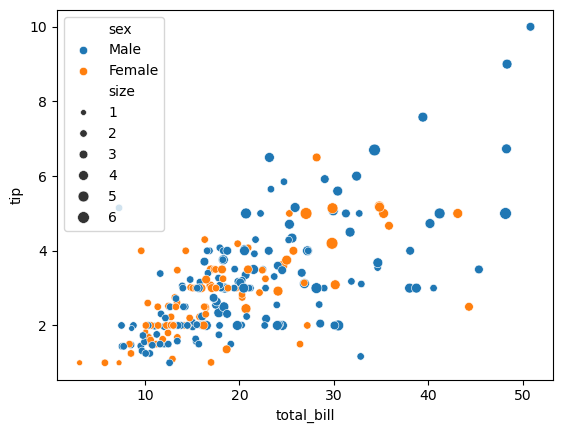

In [17]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='sex')

### **6.2 Plotting the scatter plot of Total_bill, tip and smoker** 

<Axes: xlabel='total_bill', ylabel='tip'>

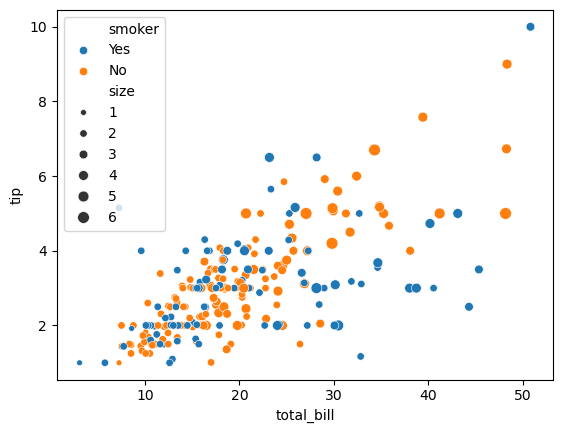

In [18]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='smoker')

### **6.3 Plotting the scatter plot of Total_bill, tip and day** 

<Axes: xlabel='total_bill', ylabel='tip'>

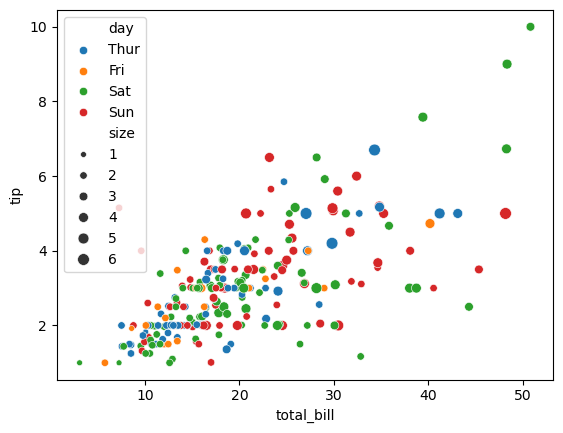

In [19]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='day')

### **6.4 Plotting the scatter plot of Total_bill, tip and time** 

<Axes: xlabel='total_bill', ylabel='tip'>

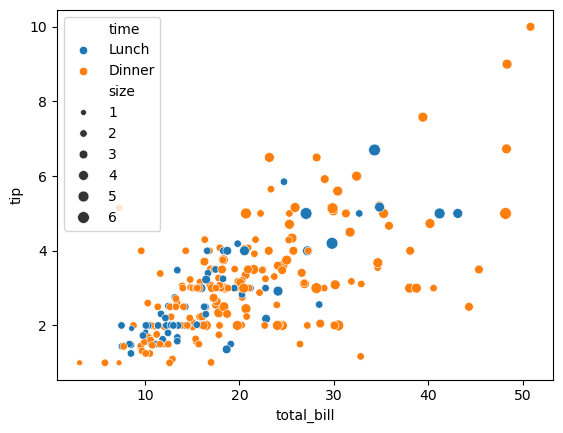

In [20]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size',hue='time')

# ==> Correlation heatmap for coorealtion

# **7.0 Model Building**

### **7.1 Label Encoding the categorical columns** 

In [21]:
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
day_le = LabelEncoder()
time_le = LabelEncoder()
#

df['sex'] = sex_le.fit_transform(df['sex'])
df['smoker'] = smoker_le.fit_transform(df['smoker'])
df['day'] = day_le.fit_transform(df['day'])
df['time'] = time_le.fit_transform(df['time'])

### **7.2 Spliting the data into X and y** 

In [22]:
# Split the data into X and y
X = df[['total_bill','tip','sex','smoker','day','time']]
y = df['tip']


### **7.3 Scaling the data** 

In [23]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **7.4 Spliting the data into train and test sets** 

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

### **7.5 Intializing, Training and Evaluating the model** 

In [25]:
# Building the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)

### **7.6 Checking the model Score** 

In [26]:
# checking the scores of the model

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test, y_pred)

print('MAE is : ',mae)
print('MSE is : ',mse)
print('R2 is  : ',r2)

MAE is :  2.460616744373306e-15
MSE is :  1.1276484904096785e-29
R2 is  :  1.0


---
